In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Questions I want answered
1. What country buys the most video games?
2. What console performed the best and what was the top three genre? 
3. What was the best performing year for video games?
4. What was the top selling genres for video games?

In [3]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.nunique(axis=0)

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
df.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


 Less Years for Year and Publisher. Let's look more into that. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [37]:
print(df.loc[[16327]])
print(df.loc[[16366]])
print(df.loc[[16427]])
print(df.loc[[16307]])
print(df.loc[[16493]])

        Rank       Name Platform  Year    Genre           Publisher  NA_Sales  \
16327  16330  Inversion       PC   NaN  Shooter  Namco Bandai Games      0.01   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16327       0.0       0.0          0.0          0.01  
        Rank                         Name Platform  Year      Genre Publisher  \
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN  Adventure   Unknown   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16366      0.01       0.0       0.0          0.0          0.01  
        Rank          Name Platform  Year         Genre Publisher  NA_Sales  \
16427  16430  Virtua Quest       GC   NaN  Role-Playing   Unknown      0.01   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16427       0.0       0.0          0.0          0.01  
        Rank           Name Platform  Year   Genre Publisher  NA_Sales  \
16307  16310  Freaky Flyers       GC   NaN  Racing   Unknown      0.01   

       EU_Sales 

 I believe this to be MAR (Missing at Random ) as why certain Publishers and Year Release are Empty so I'm going to drop these columns.

In [11]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
print('Platform Unique',df['Platform'].unique())
print('Genre',df['Genre'].unique())
print('Year of Games Release',df['Year'].unique())

Platform Unique ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Year of Games Release [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]


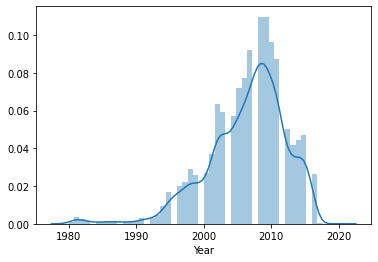

In [21]:
sns.distplot(df["Year"])

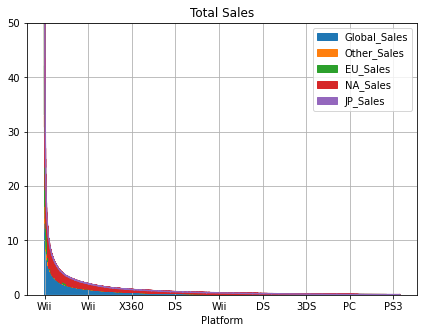

In [96]:
df.plot(x="Platform",y=["Global_Sales","Other_Sales","EU_Sales","NA_Sales","JP_Sales"],kind="area",title="Total Sales",grid=True, figsize=(7,5),ylim=(0,50))


# 1. What country buys the most video games.

In [134]:
NA = df['NA_Sales'].sum()
EU = df['EU_Sales'].sum()
Japan = df['JP_Sales'].sum()
Other= df['Other_Sales'].sum()
print(NA,EU,Japan,Other)

4327.650000000001 2406.69 1284.2700000000002 788.9100000000001


North America buys the most of the video games

# 2. What year was the top performing for global sales

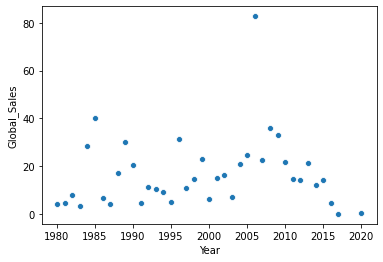

In [122]:
sns.scatterplot(x="Year",y="Global_Sales",data=max_sales)

Data Spans almost 30 years, but from the 2005 - 2010 era seems to be the hayday of Video Games being Created. Something to look into

In [128]:
max_sales = df.loc[df.groupby("Year")["Global_Sales"].idxmax()]
max_sales.sort_values(by="Global_Sales",ascending=False)



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72


2006 was the best performing year for Global Sales because of the Nintendo WII 

In [135]:
max_sales = df.loc[df.groupby("Year")["Global_Sales"].idxmax()]

The data shows that North America Sales holds second in total sales and the the sales skew more towards Wii

Let's Look More into Wii

# 3. What console performed the best and what was the top three genre? 

In [61]:
df[df["Platform"] == "Wii"] 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


Text(0.5, 1.0, 'Wii')

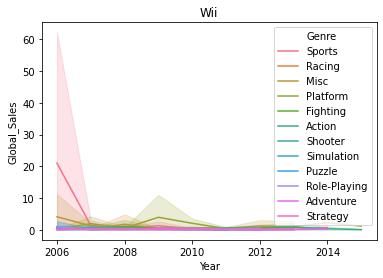

In [99]:
Wii_df= df[df["Platform"]== "Wii"]
wii = sns.lineplot(x="Year",y="Global_Sales",hue="Genre",data=Wii_df)
wii.set_title("Wii")

In [116]:
max_wii_genre =Wii_df.loc[Wii_df.groupby("Genre")["Global_Sales"].idxmax()]
max_wii_genre.sort_values(by="Global_Sales",ascending=False)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
206,207,Link's Crossbow Training,Wii,2007.0,Shooter,Nintendo,3.06,1.18,0.29,0.46,5.00
226,227,Animal Crossing: City Folk,Wii,2008.0,Simulation,Nintendo,1.87,1.12,1.32,0.37,4.68
490,491,WarioWare: Smooth Moves,Wii,2006.0,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92
718,720,Monster Hunter Tri,Wii,2009.0,Role-Playing,Nintendo,0.67,0.41,1.05,0.11,2.25


Top Total Selling Genres for the Wii were Sports, Racing, Misc and Published by Nintendo.

# 4. What was the top selling genres for video games?

In [136]:
max_genre =df.loc[df.groupby("Genre")["Global_Sales"].idxmax()]
max_genre.sort_values(by="Global_Sales",ascending=False)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04



Top three Selling Genres are Sport Games, Platformers, and Racing GAmes 